## SVM Implementation with SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt #only used for plotting!!!
%matplotlib inline

from sklearn.datasets import make_blobs #only imported .dataset to generate the dataset, package is not used for anything else!!!

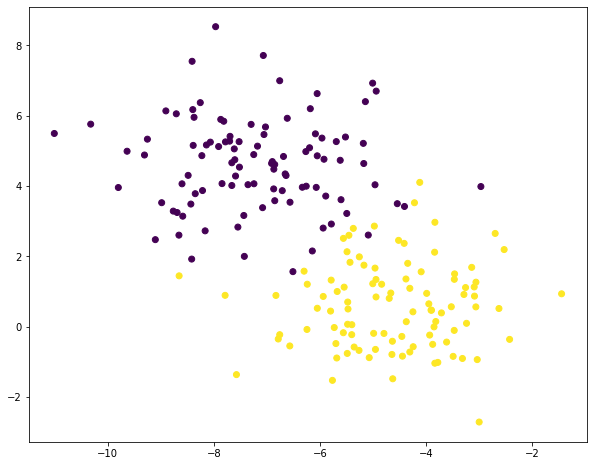

In [2]:
## generate data points
N = 200  # number of samples
D = 2  # number of dimensions
C = 2  # number of classes
seed = 12  # for reproducible experiments
cluster_std = 1.3

alpha_tol = 1e-4 # threshold for choosing support vectors

X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed, cluster_std = cluster_std)
y[y == 0] = -1  # it is more convenient to have {-1, 1} as class labels (instead of {0, 1})
y = y.astype(np.float)
plt.figure(figsize=[10, 8])
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

In [3]:
def linear(x1,x2):
    return np.dot(x1,x2)

In [4]:
class sgd_SVM(object):
    def __init__(self, C=1.0):
        self.C = C
        self.w = 0
        self.b = 0

    #define the hingeloss function, which we want to optimize
    def hingeLoss(self, w, b, X, y):
        hloss = 0.0
        hloss = hloss + 0.5*np.dot(w, w.T)
        N, D = X.shape
        for i in range(N):
            #print(f'w is {w} and X_i transpose {X.T[1]}')
            hloss = self.C *max(0, (1-y[i] * (np.dot(w, X[i]) + b))) +hloss
        return hloss[0][0]
    
    def fit(self, X, y, batch_size=96, lr=0.001, iterations=5000):
        #get number of samples, number of features and regularization parameter C
        N, D = X.shape
        C = self.C
        #inizialize weight vector and bias
        w = np.zeros((1, D))
        b = 0
        #initialize loss list
        hlosses = []
        for i in range(iterations):
        #Training Loop
            ids = np.arange(N)
            np.random.shuffle(ids)
            l = self.hingeLoss(w, b, X, y)
            hlosses.append(l)
            #Gradient descent
            for batch in range(0, N, batch_size):
                #initialize gradients for minibach
                dw = 0
                db = 0
                #enter minibach optimization
                for j in range(batch, batch + batch_size):
                    if j < N: 
                        i = ids[j]
                        if y[i] * (np.dot(w, X[i].T) + b) <= 1:
                            #gradient of hingeloss wrt w
                            dw = dw + C * y[i] * X[i]
                            #gradient of hingeloss wrt b
                            db = db + C * y[i]
                #update parameters
                w = w - lr*w + lr*dw
                b = b + lr*db
        return w.flatten(), b

In [5]:
if __name__ == "__main__":
    def generate_data(N, D, C, seed):
        X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed, cluster_std=cluster_std)
        y[y == 0] = -1  
        return X, y.astype(np.float)

    def plot_svm_sgd(X, y, w, b):
        plt.figure(figsize=[10, 8])
        # Plot the hyperplane
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        x = np.linspace(X[:, 0].min(), X[:, 0].max())
        plt.plot(x, x * slope + intercept, 'k-', label='decision boundary')
        plt.plot(x, x * slope + intercept - 1/w[1], 'k--')
        plt.plot(x, x * slope + intercept + 1/w[1], 'k--')
        # Plot all the datapoints
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.legend(loc='upper left')

    def run_svm_sgd():
        sampels, labels = generate_data(N, D, C, seed)
        sampels, labels = generate_data(N, D, C, seed)
        X_train = sampels[:150]
        X_test = sampels[150:]
        y_train = labels[:150]
        y_test = labels[150:]

        svm_sgd = sgd_SVM()
        w, b = svm_sgd.fit(X_train ,y_train, batch_size=32, lr=0.005 iterations=3000)
        plot_svm_sgd(X_train, y_train, w, b)

SyntaxError: invalid syntax (<ipython-input-5-ce249121d081>, line 31)

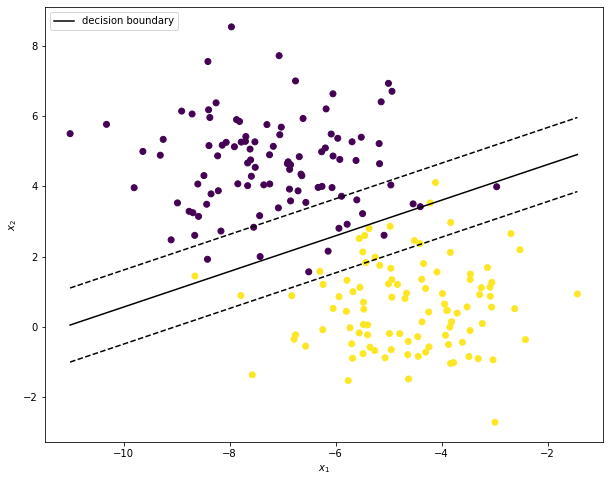

In [16]:
run_svm_sgd()